## Load Required Libraries

In [1]:
library(ggplot2)
library(lmtest)

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric




## Load Data

In [2]:
data <- read.csv("./data/mtcars.csv")
head(data)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
2,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
3,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
4,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
5,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
6,Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


## Data Visualization

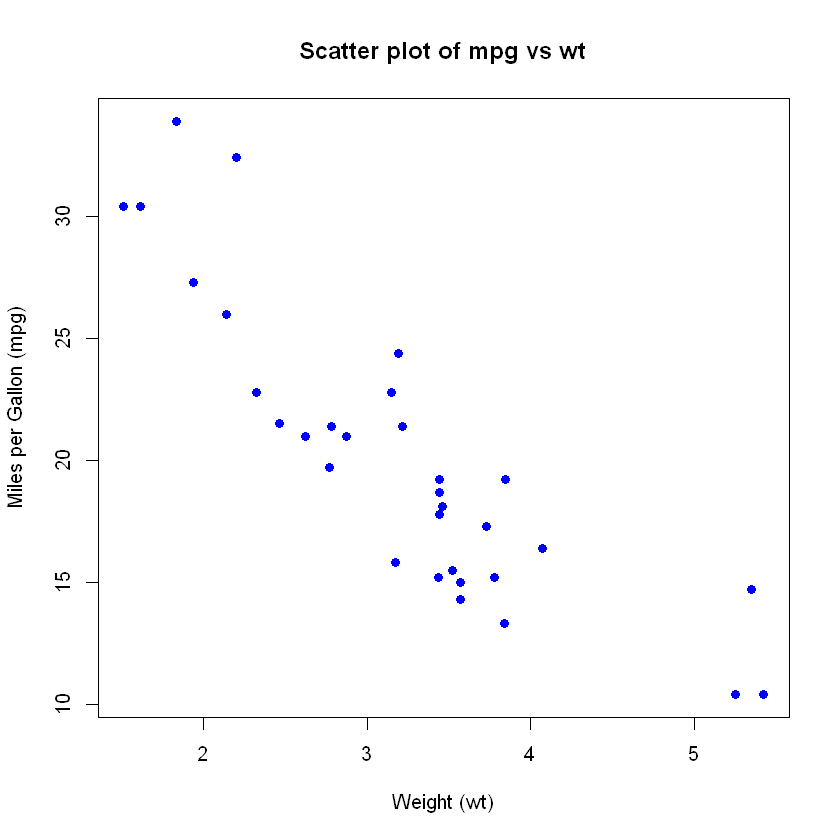

In [4]:
par(bg = "white")

# Create the scatter plot
plot(mtcars$wt, mtcars$mpg, 
     main = "Scatter plot of mpg vs wt", 
     xlab = "Weight (wt)", 
     ylab = "Miles per Gallon (mpg)", 
     pch = 19, col = "blue")


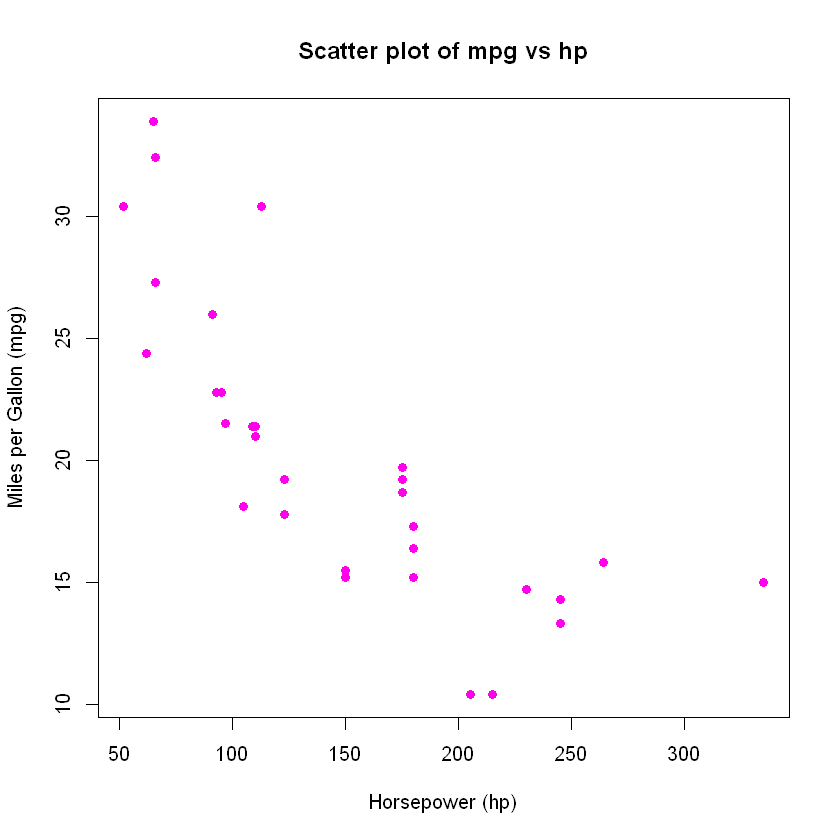

In [5]:
par(bg = "white")

# Create the scatter plot
plot(mtcars$hp, mtcars$mpg, 
     main = "Scatter plot of mpg vs hp", 
     xlab = "Horsepower (hp)", 
     ylab = "Miles per Gallon (mpg)", 
     pch = 19, col = "#ff00ea")

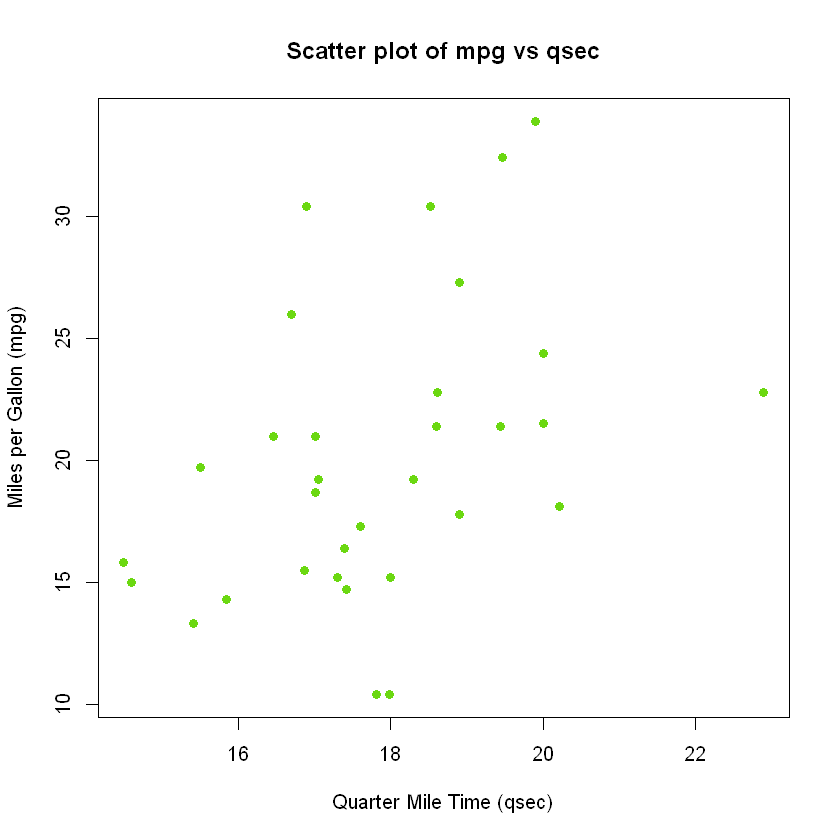

In [6]:
par(bg = "white")

# Create the scatter plot
plot(mtcars$qsec, mtcars$mpg, 
     main = "Scatter plot of mpg vs qsec", 
     xlab = "Quarter Mile Time (qsec)", 
     ylab = "Miles per Gallon (mpg)", 
     pch = 19, col = "#6bd811")

## Perform multiple linear regression

In [7]:
model <- lm(mpg ~ hp + wt + qsec, data = mtcars)
summary(model)


Call:
lm(formula = mpg ~ hp + wt + qsec, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8591 -1.6418 -0.4636  1.1940  5.6092 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.61053    8.41993   3.279  0.00278 ** 
hp          -0.01782    0.01498  -1.190  0.24418    
wt          -4.35880    0.75270  -5.791 3.22e-06 ***
qsec         0.51083    0.43922   1.163  0.25463    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.578 on 28 degrees of freedom
Multiple R-squared:  0.8348,	Adjusted R-squared:  0.8171 
F-statistic: 47.15 on 3 and 28 DF,  p-value: 4.506e-11


### Interprétation des résultats :

1. **(Intercept) : 27.61053**  
   Cela représente l'ordonnée à l'origine, c'est-à-dire la valeur estimée de `mpg` lorsque toutes les autres variables indépendantes (`hp`, `wt`, et `qsec`) sont égales à zéro. Bien que cette situation n'ait pas de sens pratique, l'intercept est nécessaire pour l'équation de régression.

   **p-value : 0.00278** (très significatif)

2. **hp (chevaux) : -0.01782**  
   Pour chaque augmentation d'une unité de la puissance du moteur (hp), tout le reste étant constant, la consommation de carburant (`mpg`) diminue de 0.01782 unités en moyenne. Cependant, cette relation n'est pas statistiquement significative (p = 0.24418), ce qui signifie que l'impact de la puissance sur `mpg` pourrait être dû au hasard.

   **p-value : 0.24418** (non significatif)

3. **wt (poids) : -4.35880**  
   Pour chaque augmentation d'une unité du poids du véhicule (wt), tout le reste étant constant, la consommation de carburant (`mpg`) diminue de 4.35880 unités. Cette variable est très significative (p = 3.22e-06), ce qui suggère que le poids a un impact important sur la consommation de carburant.

   **p-value : 3.22e-06** (très significatif)

4. **qsec (temps d'accélération) : 0.51083**  
   Pour chaque augmentation d'une unité du temps d'accélération sur un quart de mile (qsec), tout le reste étant constant, la consommation de carburant (`mpg`) augmente de 0.51083 unités en moyenne. Toutefois, cette relation n'est pas statistiquement significative (p = 0.25463).

   **p-value : 0.25463** (non significatif)

### Signification générale :

- **R² ajusté : 0.8171**  
  Après ajustement pour le nombre de prédicteurs, 81.71 % de la variance dans `mpg` est expliquée par le modèle, ce qui indique une bonne capacité de prédiction.

- **Erreur standard résiduelle : 2.578**  
  L'écart-type des résidus (ou erreurs) est de 2.578, indiquant l'étendue moyenne des différences entre les valeurs observées et les valeurs prédites.

- **F-statistic : 47.15**  
  La statistique de test F est très significative (p-value = 4.506e-11), indiquant que le modèle global est statistiquement significatif et qu'il explique mieux la variation de `mpg` que le modèle nul (sans variables explicatives).

### Équation de la régression linéaire multiple :

mpg = 27.61053 - 0.01782*hp - 4.35880*wt + 0.51083*qsec


## Predections

In [8]:
new_data <- data.frame(
  hp = c(150, 100, 200),
  wt = c(3.0, 2.5, 3.5),
  qsec = c(18, 17, 16)
)

In [9]:
predictions <- predict(model, newdata = new_data)

In [10]:
predictions

1        2        3 
21.05580 23.61548 16.96362